In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline
#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

In [6]:
pandas_df = pd.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA17_official_data.csv')
pandas_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


## DATA STRUCTURE/SHAPE/INFO

In [89]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17560 non-null  int64  
 1   Name                      17560 non-null  object 
 2   Age                       17560 non-null  int64  
 3   Photo                     17560 non-null  object 
 4   Nationality               17560 non-null  object 
 5   Flag                      17560 non-null  object 
 6   Overall                   17560 non-null  int64  
 7   Potential                 17560 non-null  int64  
 8   Club                      17317 non-null  object 
 9   Club Logo                 17560 non-null  object 
 10  Value                     17560 non-null  object 
 11  Wage                      17560 non-null  object 
 12  Special                   17560 non-null  int64  
 13  Preferred Foot            17560 non-null  object 
 14  Intern

In [90]:
pandas_df.shape

(17560, 63)

In [91]:
pandas_df.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
GKKicking              float64
GKPositioning          float64
GKReflexes             float64
Best Position           object
Best Overall Rating    float64
Length: 63, dtype: object

In [7]:
import polars as pl
polars_df = pl.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA17_official_data.csv')

In [93]:
polars_df.head(10)

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
i64,str,i64,str,str,str,i64,i64,str,str,str,str,i64,str,f64,f64,f64,str,str,str,str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
176580,""" L. Suárez""",29,"""https://cdn.sofifa.com/players…","""Uruguay""","""https://cdn.sofifa.com/flags/u…",92,92,"""FC Barcelona""","""https://cdn.sofifa.com/teams/2…","""€83M""","""€525K""",2291,"""Right""",5.0,4.0,4.0,"""High/ Medium""","""Normal (170-185)""","""Yes""","""<span class=""pos pos25"">ST""",9.0,"""Jul 11, 2014""","""nan""","""2021""","""6'0""","""190lbs""",77.0,94.0,77.0,83.0,88.0,86.0,86.0,84.0,64.0,91.0,88.0,77.0,86.0,93.0,60.0,87.0,69.0,89.0,80.0,86.0,78.0,41.0,92.0,84.0,85.0,83.0,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,"""ST""",88.0
178518,""" R. Nainggolan""",28,"""https://cdn.sofifa.com/players…","""Belgium""","""https://cdn.sofifa.com/flags/b…",86,86,"""Roma""","""https://cdn.sofifa.com/teams/5…","""€37.5M""","""€130K""",2290,"""Right""",3.0,3.0,3.0,"""High/ High""","""Stocky (170-185)""","""No""","""<span class=""pos pos22"">LF""",4.0,"""Jan 7, 2014""","""nan""","""2021""","""5'9""","""143lbs""",73.0,76.0,59.0,84.0,75.0,80.0,73.0,68.0,81.0,85.0,81.0,78.0,81.0,87.0,84.0,84.0,76.0,94.0,78.0,86.0,88.0,86.0,88.0,76.0,63.0,85.0,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,"""CDM""",84.0
181872,""" A. Vidal""",29,"""https://cdn.sofifa.com/players…","""Chile""","""https://cdn.sofifa.com/flags/c…",87,87,"""FC Bayern München""","""https://cdn.sofifa.com/teams/2…","""€41.5M""","""€180K""",2285,"""Right""",4.0,4.0,3.0,"""High/ High""","""Normal (170-185)""","""Yes""","""<span class=""pos pos11"">LDM""",23.0,"""Jul 28, 2015""","""nan""","""2019""","""5'11""","""165lbs""",76.0,77.0,81.0,84.0,78.0,76.0,76.0,68.0,82.0,83.0,77.0,74.0,75.0,89.0,77.0,84.0,82.0,93.0,79.0,85.0,91.0,89.0,80.0,80.0,84.0,86.0,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,"""CDM""",85.0
197445,""" D. Alaba""",24,"""https://cdn.sofifa.com/players…","""Austria""","""https://cdn.sofifa.com/flags/a…",86,89,"""FC Bayern München""","""https://cdn.sofifa.com/teams/2…","""€41.5M""","""€140K""",2279,"""Left""",4.0,4.0,3.0,"""High/ Medium""","""Lean (170-185)""","""Yes""","""<span class=""pos pos7"">LB""",27.0,"""Feb 10, 2010""","""nan""","""2021""","""5'11""","""168lbs""",82.0,63.0,75.0,83.0,68.0,79.0,78.0,83.0,80.0,83.0,86.0,86.0,82.0,84.0,77.0,83.0,82.0,87.0,69.0,83.0,69.0,85.0,77.0,78.0,80.0,79.0,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,"""LB""",84.0
195864,""" P. Pogba""",23,"""https://cdn.sofifa.com/players…","""France""","""https://cdn.sofifa.com/flags/f…",88,94,"""Manchester United""","""https://cdn.sofifa.com/teams/1…","""€71.5M""","""€225K""",2271,"""Right""",4.0,4.0,5.0,"""High/ Medium""","""Lean (185+)""","""Yes""","""<span class=""pos pos11"">LDM""",6.0,"""Aug 9, 2016""","""nan""","""2021""","""6'3""","""185lbs""",78.0,71.0,73.0,85.0,84.0,89.0,84.0,82.0,88.0,90.0,75.0,79.0,79.0,86.0,61.0,90.0,85.0,91.0,91.0,87.0,72.0,70.0,84.0,87.0,76.0,83.0,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,"""CAM""",85.0
173731,""" G. Bale""",26,"""https://cdn.sofifa.com/players…","""Wales""","""https://cdn.sofifa.com/flags/g…",90,90,"""Real Madrid""","""https://cdn.sofifa.com/teams/2…","""€72M""","""€375K""",2266,"""Left""",4.0,3.0,4.0,"""High/ Medium""","""Lean (170-185)""","""Yes""","""<span class=""

In [94]:
polars_df.shape

(17560, 63)

In [95]:
polars_df.dtypes

[Int64,
 String,
 Int64,
 String,
 String,
 String,
 Int64,
 Int64,
 String,
 String,
 String,
 String,
 Int64,
 String,
 Float64,
 Float64,
 Float64,
 String,
 String,
 String,
 String,
 Float64,
 String,
 String,
 String,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 String,
 Float64]

In [96]:
from skimpy import skim
skim(pandas_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17560  │ │ float64     │ 39    │                                                          │
│ │ Number of columns │ 63     │ │ string      │ 19    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA %            ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID             │  0 │               0 │ 205600 │  33100 │  16 │ 191500 │ 212900 │ 229700 │ 241100 │    ▁▃▇ │  │
│ │ Age            │  0 │               0 │  24.58 │  4.654 │  15 │     21 │     24 │     28 │     46 │  ▅▇▆▂  │  │
│ │ Overall        │  0 │               0 │  66.16 │  7.013 │  45 │     62 │     66 │     71 │     94 │ ▁▃▇▅▁  │  │
│ │ Potential      │  0 │               0 │  70.94 │   6.14 │  45 │     67 │     71 │     75 │     94 │  ▁▇▇▂  │  │
│ │ Special        │  0 │               0 │   1595 │  269.9 │ 751 │   1452 │   1633 │   1786 │   2291 │ ▁▂▅▇▅  │  │
│ │ International  │  0 │               0 │  1.112 │  0.385 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation     │    │                 │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot      │  0 │               0 │  2.936 │ 0.6578 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves    │  0 │               0 │  2.305 │  0.747 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▅▁  │  │
│ │ Jersey Number  │ 19 │ 0.1082004555808 │  20.41 │  17.05 │   1 │      9 │     18 │     27 │     99 │  ▇▆▁   │  │
│ │                │    │             656 │        │        │     │        │        │        │        │        │  │
│ │ Crossing       │  0 │               0 │  49.78 │  18.42 │   6 │     38 │     54 │     64 │     91 │ ▃▃▅▇▇▁ │  │
│ │ Finishing      │  0 │               0 │  45.21 │  19.37 │   2 │     29 │     48 │     61 │     95 │ ▃▅▆▇▅  │  │
│ │ HeadingAccurac │  0 │               0 │  52.38 │  17.45 │   4 │     45 │     56 │     65 │     94 │ ▂▁▃▇▅  │  │
│ │ y              │    │                 │        │        │     │        │        │        │        │        │  │
│ │ ShortPassing   │  0 │               0 │   58.2 │  14.87 │  10 │     53 │     62 │     68 │     92 │ ▁▂▂▇▇▁ │  │
│ │ Volleys        │  0 │               0 │  43.22 │  17.68 │   3 │     30 │     44 │     57 │     93 │ ▃▅▇▇▃  │  │
│ │ Dribbling      │  0 │               0 │  54.89 │  18.87 │   4 │     47 │     60 │     68 │     97 │ ▂▁▃▇▆  │  │
│ │ Curve          │  0 │               0 │  47.25 │  18.42 │   6 │     34 │     49 │     62 │     92 │ ▃▅▇▇▅▁ │  │
│ │ FKAccuracy     │  0 │               0 │  43.37 │  17.66 │   4 │     31 │     42 │     57 │     93 │ ▃▆▇▆▃  │  │
│ │ LongPassing    │  0 │               0 │  52.45 │   15.5 │   9 │     42 │     56 │     64 │     93 │ ▁▃▃▇▅  │  │
│ │ BallControl    │  0 │               0 │  58.03 │  16

In [97]:
#skimpy supports polars dataframes as well
skim(polars_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17560  │ │ float64     │ 39    │                                                          │
│ │ Number of columns │ 63     │ │ string      │ 19    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA %            ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID             │  0 │               0 │ 205600 │  33100 │  16 │ 191500 │ 212900 │ 229700 │ 241100 │    ▁▃▇ │  │
│ │ Age            │  0 │               0 │  24.58 │  4.654 │  15 │     21 │     24 │     28 │     46 │  ▅▇▆▂  │  │
│ │ Overall        │  0 │               0 │  66.16 │  7.013 │  45 │     62 │     66 │     71 │     94 │ ▁▃▇▅▁  │  │
│ │ Potential      │  0 │               0 │  70.94 │   6.14 │  45 │     67 │     71 │     75 │     94 │  ▁▇▇▂  │  │
│ │ Special        │  0 │               0 │   1595 │  269.9 │ 751 │   1452 │   1633 │   1786 │   2291 │ ▁▂▅▇▅  │  │
│ │ International  │  0 │               0 │  1.112 │  0.385 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation     │    │                 │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot      │  0 │               0 │  2.936 │ 0.6578 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves    │  0 │               0 │  2.305 │  0.747 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▅▁  │  │
│ │ Jersey Number  │ 19 │ 0.1082004555808 │  20.41 │  17.05 │   1 │      9 │     18 │     27 │     99 │  ▇▆▁   │  │
│ │                │    │             656 │        │        │     │        │        │        │        │        │  │
│ │ Crossing       │  0 │               0 │  49.78 │  18.42 │   6 │     38 │     54 │     64 │     91 │ ▃▃▅▇▇▁ │  │
│ │ Finishing      │  0 │               0 │  45.21 │  19.37 │   2 │     29 │     48 │     61 │     95 │ ▃▅▆▇▅  │  │
│ │ HeadingAccurac │  0 │               0 │  52.38 │  17.45 │   4 │     45 │     56 │     65 │     94 │ ▂▁▃▇▅  │  │
│ │ y              │    │                 │        │        │     │        │        │        │        │        │  │
│ │ ShortPassing   │  0 │               0 │   58.2 │  14.87 │  10 │     53 │     62 │     68 │     92 │ ▁▂▂▇▇▁ │  │
│ │ Volleys        │  0 │               0 │  43.22 │  17.68 │   3 │     30 │     44 │     57 │     93 │ ▃▅▇▇▃  │  │
│ │ Dribbling      │  0 │               0 │  54.89 │  18.87 │   4 │     47 │     60 │     68 │     97 │ ▂▁▃▇▆  │  │
│ │ Curve          │  0 │               0 │  47.25 │  18.42 │   6 │     34 │     49 │     62 │     92 │ ▃▅▇▇▅▁ │  │
│ │ FKAccuracy     │  0 │               0 │  43.37 │  17.66 │   4 │     31 │     42 │     57 │     93 │ ▃▆▇▆▃  │  │
│ │ LongPassing    │  0 │               0 │  52.45 │   15.5 │   9 │     42 │     56 │     64 │     93 │ ▁▃▃▇▅  │  │
│ │ BallControl    │  0 │               0 │  58.03 │  16

In [98]:
from summarytools import dfSummary
dfSummary(pandas_df)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 205606.3 (33102.0)min < med < max:16.0 < 212936.0 < 241056.0IQR (CV) : 38184.0 (6.2),"17,560 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAjNJREFUeJzt3bGO2kAURuE72QSZFbIFSLzEvoH7tHnYtOlSUKTmDeiQEBjBYq2BSbWrTbFsmMHy/Nb5WriyiyOkQb6y894bkLovXd8A8D++dn0D6A/n3NDMBoHjL97740cfEiruwjk3nE6nP/I8H4fM73a7jXPu50exEiruZZDn+bgsy2NRFPUtg1VVZfP5fLxerwdmRqhoX1EU9Ww2ew4YHV77kMMUJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJPDgNN5E7jzll8vl2z3v5z1ChZnF7zw1TZOdz+enuq5/m1nIE/5XESpeBe88mZktl8vxYrF4PJ1OD23cHKHiH6E7T5vN5urOUywOU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDAE/49E7Gg1+pyXixC7ZGYBb22l/NiEWq/BC/otb2cF4tQeyhkQa/t5bxYHKYggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgcf8EpPyK3S6RKgJSf0VOl0i1LQk/QqdLhFqglJ9hU6XOExBAr+oLejrynKXCPXO+ryy3KVPQ438u+TFe38MnFW9dj4ajWZlWe76trLcpauhxv5dst1u9865X2Z28wnWzLLJZPK9KIqR0rVffxWbpvkTeG07HA7ZarV6vHVuv99nofMxs7HzVVVln33nL55t3AAaWvuuAAAAAElFTkSuQmCC"">",0(0.0%)
2,Name[object],1. J. Rodríguez2. C. Rodríguez3. A. Traoré4. J. Sánchez5. M. González6. J. Jones7. D. González8. A. González9. J. Williams10. D. Rodríguez11. other,"9 (0.1%)8 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)5 (0.0%)5 (0.0%)17,497 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA0JJREFUeJzt3MFpG2EURtE3QiT2RkIIVELSg4rINh2riDRhpEXieOMsgkvIHZicU8G/uPAQzKfl/f19oLBb+wH8P8RGRmxkxEZGbGTERkZsZMRGRmxkxEZmtyzL12VZntZ+CNu3m5kvM/N57Yewfc4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZzcyPmfm99kPYvsW/GFFxRsmIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MiIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJSM2MmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJbPMzPPMfFr7IWze2/58Pn87HA6ntV/Ctj0ej5f94XA4Xa/XX8fj8XXtB7FN9/v96Xa7nfYzM8fj8fVyufxc+1Fs2rMfCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGT2M38/AVn7IWzXR1/L+Xz+7uNJ/rXH4/His3Aqb9ZVZPxAICM2MmIjIzYyYiMjNjJiIyM2MmIj8wdFqVdsnnPGyQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Age[int64],Mean (sd) : 24.6 (4.7)min < med < max:15.0 < 24.0 < 46.0IQR (CV) : 7.0 (5.3),30 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqVJREFUeJzt3DFy2kAUgOG3wRABGQFDAh0tRWZSUHKIHDZHSEFLww3omBGMGBRkBChVUjkYaaWwb/m/frGK3zZaPa3J81wA13149AUA93h59AXcYoxpi0ir5PJTnufHKq8Hj+NsqMaY9nA4/B6G4aDM+v1+vzPG/CBWPzgbqoi0wjAczOfzY6/XS4ssjOM4WCwWgyiKWiJCqB5wOVQREen1euloNPpVYmm78ovBw3AzBRUIFSoQKlSo9Tuq5fZSeL1em1VeD/SqLVTb7aUsy4LL5fI1TdOfIlLmZgoeqfMvauntJRGR9Xo9WK1WnfP53Kjj4qBL7dtTZbeXdrsd20v4y/l91LIul0tTREJjTNmP4BGsQ7wMNUmSZpZl3yaTSaPRaBT+2iHCI1jXeBnq6XR6CYKgM5vN0vF4vCu6nkew7vEy1D+63W7Zx68iPIJ1Chv+UIFQoQKhQgVChQqEChUIFSoQKlQgVKjg9Ya/DctZAeYEKkaob7CdFWBOoHqE+gabWQHmBOpBqDdYzAowJ1AxbqagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjw7jyqxfHmT3u0Oa+xVO9mqDbHmz/r0ea8xlKP9/6ilj7e/FmPNuc1lnrc9SpKmePNn/1oc15jqRY3U1CBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFTjI1zGWQ9cing5eE6pDbIeuRfwdvCZUh9gMXYv4PXhNqA6yGLoW8XTwmpspqECoUIF//Z7x9VVtQvWIz69q3xVqHMdB0Q8+HA6BiEiSJMFms+n8z/Vaf7btdW+3209BEHSm06np9/uvRd

In [99]:
#summarytools does not support polars dataframes
# dfSummary(polars_df)

## NULL VALUES

In [100]:
#only club has null values
polars_df.null_count()

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
pandas_df.isna().sum().sort_values(ascending=False).head(20)
pandas_df.duplicated().sum(), pandas_df.duplicated(subset=['Name']).sum()  # adjust subset keys
pandas_df.select_dtypes('object').nunique().sort_values(ascending=False).head(20)  # high-cardinality cats

Photo                   17560
Name                    16596
Joined                   1720
Club Logo                 663
Club                      632
Loaned From               316
Value                     203
Nationality               160
Flag                      160
Weight                     56
Wage                       41
Contract Valid Until       34
Position                   29
Height                     21
Body Type                  16
Best Position              15
Work Rate                   9
Preferred Foot              2
Real Face                   2
dtype: int64

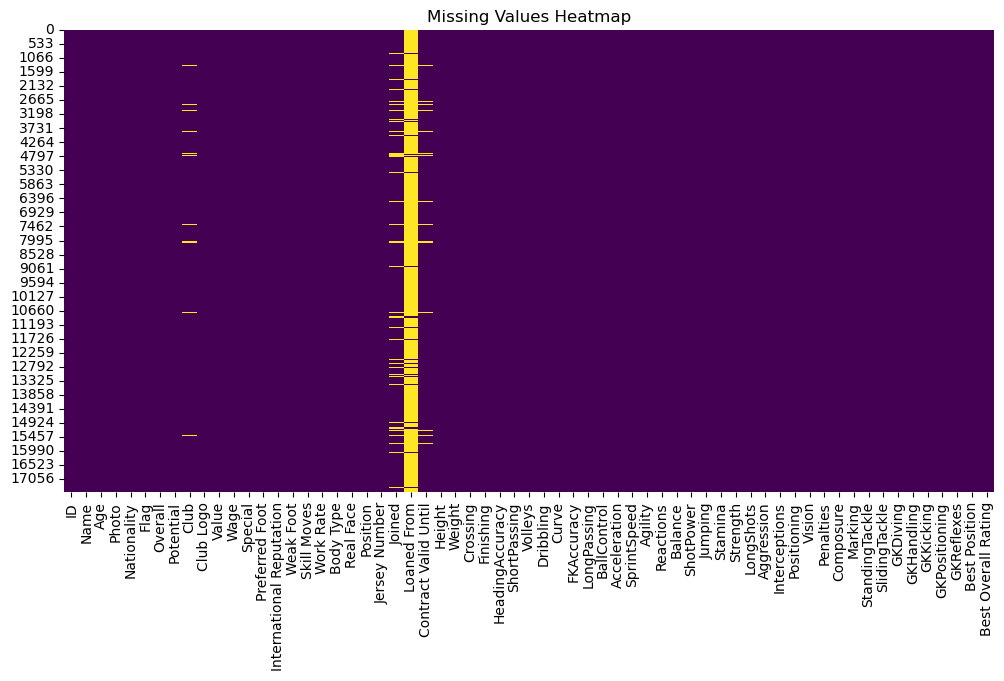

In [102]:
#heatmap of missing values shows only club has missing values of type MCAR (Missing Completely at Random)
#I want to understand the pattern of missingness, why is the data missing?
#nan values in "loaned from" column are because the player is not on loan
#nan values in "club" column are because the player is a free agent
plt.figure(figsize=(12, 6))
sns.heatmap(pandas_df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Data Cleaning

In [103]:
#dropping columns that are not useful for analysis
#these columns are images and logos links which do not add value to the analysis
col = ['Photo','Flag','Club Logo']
fifa = pandas_df.drop(columns = col, axis = 1)
fifa.shape

(17560, 60)

In [104]:
#Clean position column as it has some junk span classes data
#What is difference between position and best position?
#Convert value and wage to numeric
#What is the special column?
#Body type has easter egg values like "Messi" and "C. Ronaldo"
#Convert height and weight to numeric
#Convert work rate to categorical low, medium, high
#Convert joined date to datetime
#Find Loan Sharks from loaned from column

In [105]:
#Clean position column
import re

pattern = re.compile(r">([^<]+)$")  # capture everything between > and <

fifa["Position_clean"] = fifa["Position"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Position", "Position_clean", "Best Position"]].head(10))


                      Position Position_clean Best Position
0   <span class="pos pos25">ST             ST            ST
1   <span class="pos pos22">LF             LF           CDM
2  <span class="pos pos11">LDM            LDM           CDM
3    <span class="pos pos7">LB             LB            LB
4  <span class="pos pos11">LDM            LDM           CAM
5   <span class="pos pos23">RW             RW            ST
6  <span class="pos pos28">SUB            SUB            RB
7    <span class="pos pos7">LB             LB           LWB
8  <span class="pos pos13">RCM            RCM            CM
9   <span class="pos pos27">LW             LW            ST


In [106]:
#Number of players where Position != Best Position: 115
diff_df = fifa[fifa['Position_clean'] != fifa['Best Position']]
print(f"Number of players where Position != Best Position: {len(diff_df)}")
print(diff_df[['Name', 'Position_clean', 'Best Position']].head(10))

Number of players where Position != Best Position: 15241
                  Name Position_clean Best Position
1        R. Nainggolan             LF           CDM
2             A. Vidal            LDM           CDM
4             P. Pogba            LDM           CAM
5              G. Bale             RW            ST
6          A. Florenzi            SUB            RB
7            L. Baines             LB           LWB
8            L. Modrić            RCM            CM
9    Cristiano Ronaldo             LW            ST
10        C. Marchisio            SUB            CM
11             D. Srna             RB            CM


In [109]:
#Convert value and wage to numeric
def convert(df_value):
    try:
        # If already a float or int, return as is
        if isinstance(df_value, (float, int)):
            return df_value
        # If not a string, return 0
        if not isinstance(df_value, str):
            return 0
        # Remove currency symbol and commas
        s = df_value.replace('€', '').replace(',', '').strip().upper()
        if s == '':
            return 0
        # Handle suffix
        if s[-1] == 'M':
            value = float(s[:-1]) * 1_000_000
        elif s[-1] == 'K':
            value = float(s[:-1]) * 1_000
        else:
            value = float(s)
    except Exception:
        value = 0
    return value

fifa['Value'] = fifa['Value'].apply(convert)
fifa['Wage'] = fifa['Wage'].apply(convert)
print(fifa[['Value', 'Wage']])

            Value      Wage
0      83000000.0  525000.0
1      37500000.0  130000.0
2      41500000.0  180000.0
3      41500000.0  140000.0
4      71500000.0  225000.0
...           ...       ...
17555    130000.0    1000.0
17556     90000.0    1000.0
17557    100000.0     500.0
17558     60000.0    2000.0
17559     60000.0     500.0

[17560 rows x 2 columns]


In [ ]:
#What is the special column?
fifa['Special'].describe()

count    17560.000000
mean      1595.468223
std        269.862012
min        751.000000
25%       1452.000000
50%       1633.000000
75%       1786.000000
max       2291.000000
Name: Special, dtype: float64

count    17560.000000
mean      1595.468223
std        269.862012
min        751.000000
25%       1452.000000
50%       1633.000000
75%       1786.000000
max       2291.000000
Name: Special, dtype: float64


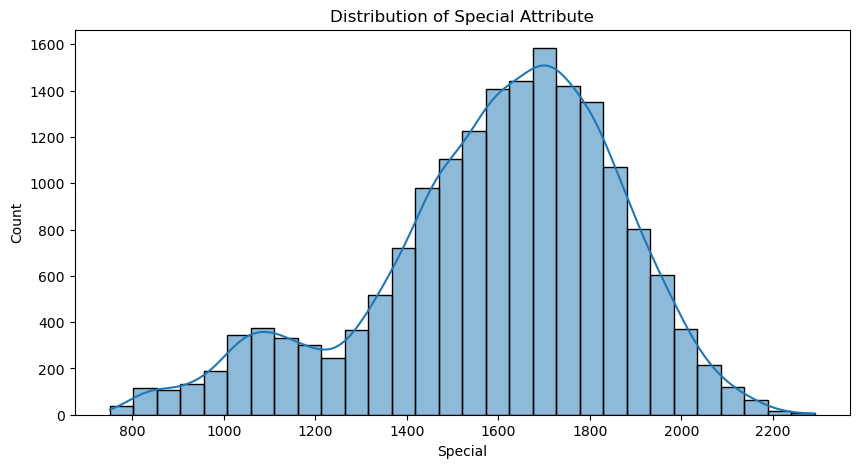

                 Name  Special  Overall  Potential               Club
0           L. Suárez     2291       92         92       FC Barcelona
1       R. Nainggolan     2290       86         86               Roma
2            A. Vidal     2285       87         87  FC Bayern München
3            D. Alaba     2279       86         89  FC Bayern München
4            P. Pogba     2271       88         94  Manchester United
5             G. Bale     2266       90         90        Real Madrid
6         A. Florenzi     2264       82         85               Roma
7           L. Baines     2245       83         83            Everton
8           L. Modrić     2231       89         89        Real Madrid
9   Cristiano Ronaldo     2223       94         94        Real Madrid


In [ ]:
# Summary statistics for the Special column
print(fifa['Special'].describe())

# Distribution plot for Special
plt.figure(figsize=(10,5))
sns.histplot(fifa['Special'], bins=30, kde=True)
plt.title('Distribution of Special Attribute')
plt.xlabel('Special')
plt.show()

# Top 10 players by Special
top_special = fifa.nlargest(10, 'Special')[['Name', 'Special', 'Overall', 'Potential', 'Club']]
print(top_special)

In [ ]:
# Special column is a column which is just like overall but with more granularity
# It ranges from 47 to 2200 with mean of 611. It is likely a composite score based on various attributes
# It helps to differentiate players with same overall rating by providing a more detailed score

In [ ]:
# Body type has easter egg values like "Messi" and "C. Ronaldo"
# Unique values in Body Type column
print(fifa['Body Type'].unique())

# Find rows with Body Type as 'Messi' or 'C. Ronaldo'
easter_eggs = fifa[fifa['Body Type'].isin(['Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Akinfenwa', 'Courtois'])]
print(easter_eggs[['Name', 'Body Type', 'Overall', 'Special', 'Club']])

['Normal (170-185)' 'Stocky (170-185)' 'Lean (170-185)' 'Lean (185+)'
 'Normal (170-)' 'C. Ronaldo' 'Normal (185+)' 'Messi' 'Stocky (170-)'
 'Lean (170-)' 'Shaqiri' 'Neymar' 'Normal (190+)' 'Stocky (185+)'
 'Akinfenwa' 'Courtois']
                     Name   Body Type  Overall  Special               Club
9       Cristiano Ronaldo  C. Ronaldo       94     2223        Real Madrid
58               L. Messi       Messi       93     2155       FC Barcelona
120            X. Shaqiri     Shaqiri       82     2117         Stoke City
168                Neymar      Neymar       92     2098       FC Barcelona
10997        A. Akinfenwa   Akinfenwa       64     1552  Wycombe Wanderers
15266         T. Courtois    Courtois       89     1282            Chelsea


In [ ]:
# Clean Body Type Feature in the dataset
def clean_body_type(body_type):
    if pd.isna(body_type):
        return np.nan
    body_type = body_type.strip()
    # List of known body types including easter eggs
    known_types = [
        'Lean', 'Normal', 'Stocky', 'Muscular', 'Average',
        'Akinfenwa', 'Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Courtois'
    ]
    # Extract main type before any parenthesis or space
    import re
    main_type = re.match(r'^(\w+)', body_type)
    # If body_type matches a known type, return as is
    if body_type in known_types:
        return body_type
    # If main_type is in known types, return it
    if main_type and main_type.group(1) in known_types:
        return main_type.group(1)
    # Otherwise, return main_type or original
    if main_type:
        return main_type.group(1)
    return body_type

fifa['Body Type Clean'] = fifa['Body Type'].apply(clean_body_type)
print(fifa[['Body Type Clean', 'Body Type']].value_counts())

Body Type Clean  Body Type       
Normal           Normal (170-185)    6239
Lean             Lean (170-185)      3842
Normal           Normal (185+)       3549
Lean             Lean (185+)         1720
Stocky           Stocky (170-185)     654
Normal           Normal (170-)        630
Lean             Lean (170-)          413
Stocky           Stocky (185+)        383
                 Stocky (170-)        121
Normal           Normal (190+)          3
Neymar           Neymar                 1
Courtois         Courtois               1
Akinfenwa        Akinfenwa              1
Messi            Messi                  1
C. Ronaldo       C. Ronaldo             1
Shaqiri          Shaqiri                1
Name: count, dtype: int64


In [ ]:
fifa['Height'] = pandas_df['Height']
fifa['Weight'] = pandas_df['Weight']
print(fifa[['Height', 'Weight']].head(10))

  Height  Weight
0    6'0  190lbs
1    5'9  143lbs
2   5'11  165lbs
3   5'11  168lbs
4    6'3  185lbs
5    6'0  163lbs
6    5'8  148lbs
7    5'7  154lbs
8    5'9  143lbs
9    6'1  176lbs


In [ ]:
def height_conversion(height):
    try:
        if pd.isna(height):
            return np.nan
        # Remove spaces and handle strings like "5'9"
        height_str = str(height).replace(" ", "")
        if "'" in height_str:
            ft, inch = height_str.split("'")
            ft = float(ft)
            inch = float(inch) if inch else 0
        else:
            # If only feet provided, no inches
            ft = float(height_str)
            inch = 0
        total_cm = (ft * 12 + inch) * 2.54
        return total_cm
    except Exception:
        return np.nan

fifa['Height'] = fifa['Height'].apply(height_conversion)
fifa['Height'] = fifa['Height'].fillna(fifa['Height'].mean())
print(fifa['Height'].head())

0    182.88
1    175.26
2    180.34
3    180.34
4    190.50
Name: Height, dtype: float64


In [ ]:
value = float(fifa['Weight'][0][0:-3])*0.453592
print('%0.2f'%value)

#in kg
def weight_conversion(weight):
    if(pd.isna(weight))!= True:
        w = int(weight[0:-3])*0.453592
        return w
    else:
        return weight

fifa['Weight'] = fifa['Weight'].apply(weight_conversion)

fifa['Weight'] = fifa['Weight'].fillna(value = fifa['Weight'].mean())

fifa['Weight'][13230:13239]

86.18


13230    69.853168
13231    84.821704
13232    68.945984
13233    71.213944
13234    78.925008
13235    79.832192
13236    76.203456
13237    81.192968
13238    77.110640
Name: Weight, dtype: float64

In [ ]:
#Convert height and weight to numeric, i.e into cms and kgs respectfully
print(fifa[['Height', 'Weight']].head(10))

   Height     Weight
0  182.88  86.182480
1  175.26  64.863656
2  180.34  74.842680
3  180.34  76.203456
4  190.50  83.914520
5  182.88  73.935496
6  172.72  67.131616
7  170.18  69.853168
8  175.26  64.863656
9  185.42  79.832192


In [ ]:
fifa['Joined'] = pandas_df['Joined']

In [ ]:
#Convert joined date to datetime
def date_conversion(date):
    if pd.isna(date):
        return np.nan
    if isinstance(date, str):
        try:
            # Try parsing with pandas to_datetime, dayfirst for European format
            dt = pd.to_datetime(date, errors='coerce', dayfirst=True)
            if pd.isna(dt):
                # Try parsing with common formats manually
                for fmt in ['%b %d, %Y', '%d %b %Y', '%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y']:
                    try:
                        dt = pd.to_datetime(date, format=fmt, errors='coerce')
                        if not pd.isna(dt):
                            return dt
                    except Exception:
                        continue
            return dt
        except Exception:
            return np.nan
    return np.nan

fifa['Joined'] = fifa['Joined'].apply(date_conversion)
print(fifa['Joined'].head(10))

0   2014-07-11
1   2014-01-07
2   2015-07-28
3   2010-02-10
4   2016-08-09
5   2013-09-02
6   2010-07-01
7   2007-08-07
8   2012-08-01
9   2009-07-01
Name: Joined, dtype: datetime64[ns]


In [ ]:
#Convert work rate to categorical low, medium, high
def work_rate_conversion(rate):
    if pd.isna(rate):
        return (np.nan, np.nan)
    if isinstance(rate, str) and '/' in rate:
        try:
            attack, defense = rate.split('/')
            return (attack.strip(), defense.strip())
        except Exception:
            return (np.nan, np.nan)
    return (np.nan, np.nan)

fifa[['Attacking Work Rate', 'Defensive Work Rate']] = fifa['Work Rate'].apply(work_rate_conversion).apply(pd.Series)
fifa[['Work Rate', 'Attacking Work Rate', 'Defensive Work Rate']].head(10)

,Work Rate,Attacking Work Rate,Defensive Work Rate
0,High/ Medium,High,Medium
1,High/ High,High,High
2,High/ High,High,High
3,High/ Medium,High,Medium
4,High/ Medium,High,Medium
5,High/ Medium,High,Medium
6,High/ Medium,High,Medium
7,High/ Medium,High,Medium
8,High/ Medium,High,Medium
9,High/ Low,High,Low


In [ ]:
#Clean the loaned from column
import re

pattern = re.compile(r">(.*?)<")  # capture everything between > and <

fifa["Loaned From_clean"] = fifa["Loaned From"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Loaned From", "Loaned From_clean"]].head(10))

#it will show Nan/None for players who are not on loan
#other unique values are clubs from which players are loaned come later up in the dataset

  Loaned From Loaned From_clean
0         NaN              None
1         NaN              None
2         NaN              None
3         NaN              None
4         NaN              None
5         NaN              None
6         NaN              None
7         NaN              None
8         NaN              None
9         NaN              None


In [ ]:
#Find Loan Sharks from loaned from column
fifa['Loaned From_clean'].value_counts().head(10)

Loaned From_clean
Roma                      19
Atalanta                  18
Juventus                  16
Inter                     16
Chievo Verona             15
San Lorenzo de Almagro    14
Lazio                     14
FC Porto                  14
SL Benfica                14
Udinese                   14
Name: count, dtype: int64

## Final Fifa Dataset Looks like

In [ ]:
# Drop Work Rate, body Type, Position, Loaned From as we cleaned them and have better dataset columns now
cols_to_drop = ['Work Rate', 'Body Type', 'Position', 'Loaned From']
fifa = fifa.drop(columns=cols_to_drop)
print(fifa.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Position_clean',
       'Body Type Clean', 'Attacking Work Rate', 'Defensive Work Rate',
       'Loaned From_clean'],
      dtype='object')


In [ ]:
fifa.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Position_clean,Body Type Clean,Attacking Work Rate,Defensive Work Rate,Loaned From_clean
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,83000000.0,525000.0,2291,...,31.0,33.0,37.0,ST,88.0,ST,Normal,High,Medium,None
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,37500000.0,130000.0,2290,...,14.0,8.0,11.0,CDM,84.0,LF,Stocky,High,High,None
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,41500000.0,180000.0,2285,...,4.0,2.0,4.0,CDM,85.0,LDM,Normal,High,High,None
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,41500000.0,140000.0,2279,...,14.0,15.0,9.0,LB,84.0,LB,Lean,High,Medium,None
4,195864,P. Pogba,23,France,88,94,Manchester United,71500000.0,225000.0,2271,...,2.0,4.0,3.0,CAM,85.0,LDM,Lean,High,Medium,None
5,173731,G. Bale,26,Wales,90,90,Real Madrid,72000000.0,375000.0,2266,...,11.0,5.0,6.0,ST,88.0,RW,Lean,High,Medium,None
6,203551,A. Florenzi,25,Italy,82,85,Roma,20500000.0,70000.0,2264,...,10.0,11.0,10.0,RB,81.0,SUB,Lean,High,Medium,None
7,163631,L. Baines,31,England,83,83,Everton,14500000.0,100000.0,2245,...,10.0,13.0,12.0,LWB,81.0,LB,Normal,High,Medium,None
8,177003,L. Modrić,30,Croatia,89,89,Real Madrid,54000000.0,325000.0,2231,...,7.0,14.0,9.0,CM,86.0,RCM,Lean,High,Medium,None
9,20801,Cristiano Ronaldo,31,Portugal,94,94,Real Madrid,87000000.0,575000.0,2223,...,15.0,14.0,11.0,ST,91.0,LW,C. Ronaldo,High,Low,None


In [ ]:
skim(fifa)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17560  │ │ float64     │ 43    │                                                          │
│ │ Number of columns │ 61     │ │ string      │ 12    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA ┃ NA %        ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ ID         │  0 │           0 │  205600 │   33100 │    16 │ 191500 │ 212900 │  229700 │    241100 │    ▁▃▇ │  │
│ │ Age        │  0 │           0 │   24.58 │   4.654 │    15 │     21 │     24 │      28 │        46 │  ▅▇▆▂  │  │
│ │ Overall    │  0 │           0 │   66.16 │   7.013 │    45 │     62 │     66 │      71 │        94 │ ▁▃▇▅▁  │  │
│ │ Potential  │  0 │           0 │   70.94 │    6.14 │    45 │     67 │     71 │      75 │        94 │  ▁▇▇▂  │  │
│ │ Value      │  0 │           0 │ 1931000 │ 4649000 │     0 │ 275000 │ 650000 │ 1500000 │ 106000000 │   ▇    │  │
│ │ Wage       │  0 │           0 │   11080 │   22360 │     0 │   2000 │   4000 │   10000 │    575000 │   ▇    │  │
│ │ Special    │  0 │           0 │    1595 │   269.9 │   751 │   1452 │   1633 │    1786 │      2291 │ ▁▂▅▇▅  │  │
│ │ Internatio │  0 │           0 │   1.112 │   0.385 │     1 │      1 │      1 │       1 │         5 │   ▇▁   │  │
│ │ nal        │    │             │         │         │       │        │        │         │           │        │  │
│ │ Reputation │    │             │         │         │       │        │        │         │           │        │  │
│ │ Weak Foot  │  0 │           0 │   2.936 │  0.6578 │     1 │      3 │      3 │       3 │         5 │  ▃ ▇▂  │  │
│ │ Skill      │  0 │           0 │   2.305 │   0.747 │     1 │      2 │      2 │       3 │         5 │ ▂▇ ▅▁  │  │
│ │ Moves      │    │             │         │         │       │        │        │         │           │        │  │
│ │ Jersey     │ 19 │ 0.108200455 │   20.41 │   17.05 │     1 │      9 │     18 │      27 │        99 │  ▇▆▁   │  │
│ │ Number     │    │     5808656 │         │         │       │        │        │         │           │        │  │
│ │ Height     │  0 │           0 │   181.1 │   6.651 │ 154.9 │  175.3 │  180.3 │   185.4 │     205.7 │  ▁▅▇▂  │  │
│ │ Weight     │  0 │           0 │   75.23 │    6.91 │ 48.08 │  69.85 │  74.84 │   79.83 │     110.2 │   ▂▇▃  │  │
│ │ Crossing   │  0 │           0 │   49.78 │   18.42 │     6 │     38 │     54 │      64 │        91 │ ▃▃▅▇▇▁ │  │
│ │ Finishing  │  0 │           0 │   45.21 │   19.37 │     2 │     29 │     48 │      61 │        95 │ ▃▅▆▇▅  │  │
│ │ HeadingAcc │  0 │           0 │   52.38 │   17.45 │     4 │     45 │     56 │      65 │        94 │ ▂▁▃▇▅  │  │
│ │ uracy      │    │             │         │         │ 

## Graphs(temp)

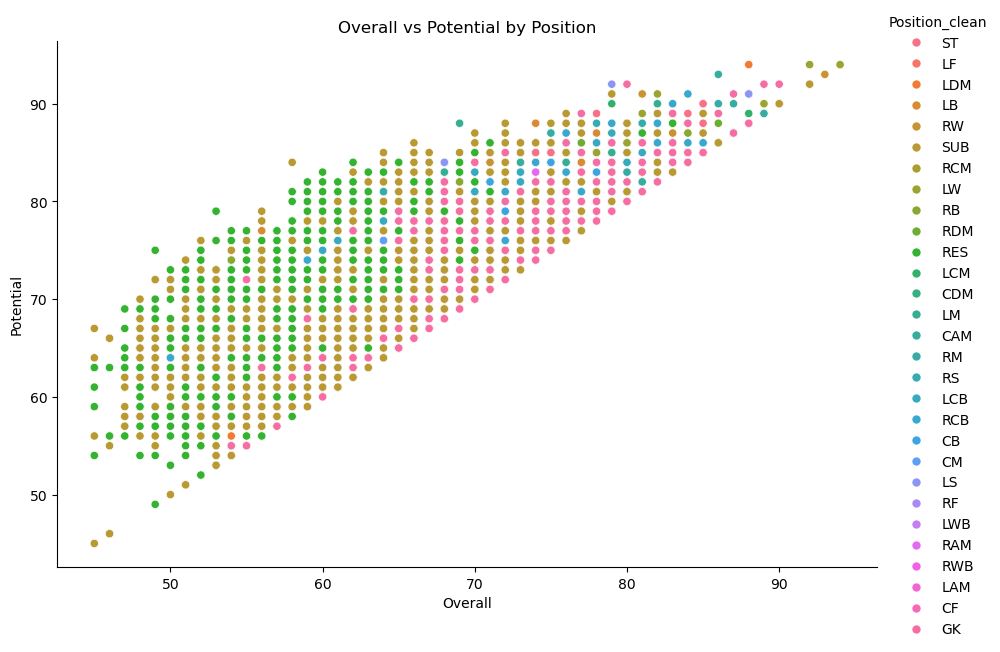

In [ ]:
sns.relplot(data=fifa, x='Overall', y='Potential', hue='Position_clean', kind='scatter', height=6, aspect=1.5)
plt.title('Overall vs Potential by Position')
plt.show()

In [ ]:
#highest potential players
top_potential = pandas_df.nlargest(10, 'Potential')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Potential:")
print(top_potential)

Top 10 Players by Potential:
                     Name  Overall  Potential               Club   Wage
4                P. Pogba       88         94  Manchester United  €225K
9       Cristiano Ronaldo       94         94        Real Madrid  €575K
168                Neymar       92         94       FC Barcelona  €450K
58               L. Messi       93         93       FC Barcelona  €575K
284             P. Dybala       86         93           Juventus  €180K
0               L. Suárez       92         92       FC Barcelona  €525K
657             K. Mbappé       79         92          AS Monaco   €40K
12372            M. Neuer       92         92  FC Bayern München  €225K
13739              De Gea       90         92  Manchester United  €190K
15266         T. Courtois       89         92            Chelsea  €170K


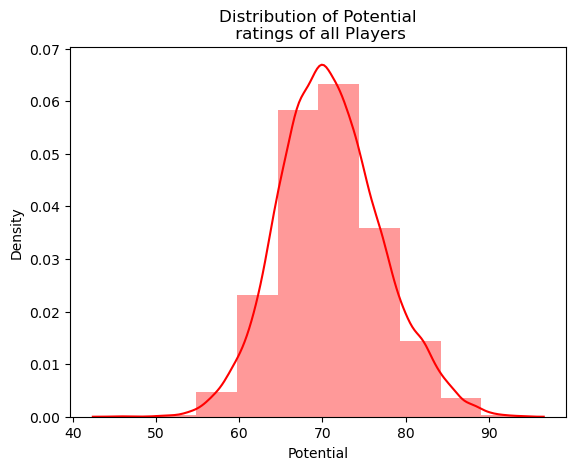

In [ ]:
# Distribution of Potential ratings
sns.distplot(fifa['Potential'], bins=10, color='r')
plt.title("Distribution of Potential\n ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [ ]:
#highest overall players
top_overall = pandas_df.nlargest(10, 'Overall')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Overall:")
print(top_overall)

Top 10 Players by Overall:
                     Name  Overall  Potential               Club   Wage
9       Cristiano Ronaldo       94         94        Real Madrid  €575K
58               L. Messi       93         93       FC Barcelona  €575K
0               L. Suárez       92         92       FC Barcelona  €525K
168                Neymar       92         94       FC Barcelona  €450K
12372            M. Neuer       92         92  FC Bayern München  €225K
5                 G. Bale       90         90        Real Madrid  €375K
109        R. Lewandowski       90         90  FC Bayern München  €250K
118        Z. Ibrahimović       90         90  Manchester United  €300K
13739              De Gea       90         92  Manchester United  €190K
8               L. Modrić       89         89        Real Madrid  €325K


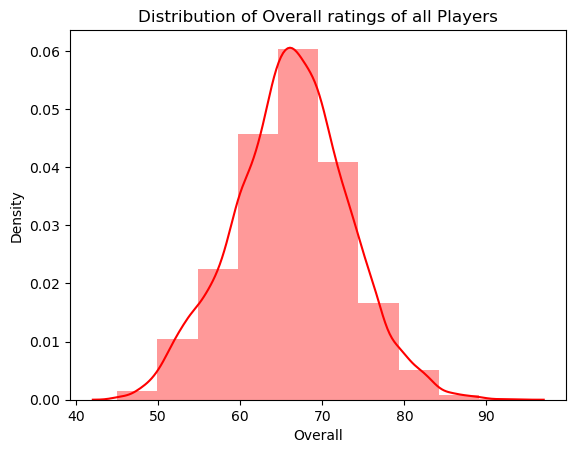

In [ ]:
# Distribution of Overall ratings
sns.distplot(fifa['Overall'], bins=10, color='r')
plt.title("Distribution of Overall ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [ ]:
# Save the final dataframe to a CSV file
fifa.to_csv('fifa_dataset_cleaned/fifa_final17.csv', index=False)